In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
insr = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insr.head()

In [5]:
# nnormalize & scale data
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
X = insr.drop("charges", axis =1)
y = insr["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [6]:
tf.random.set_seed(42)
ins_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
ins_model.compile(loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['mae'])
        
history = ins_model.fit(X_train_normal, y_train, epochs=200, verbose=0) 
ins_model_loss, ins_model_mae = ins_model.evaluate(X_test_normal, y_test)

2022-05-06 19:52:51.266334: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


Text(0.5, 0, 'epochs')

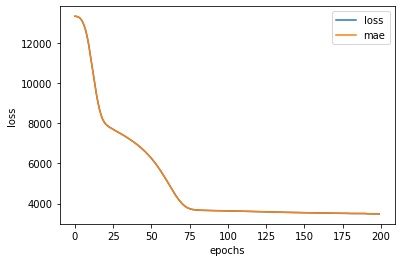

In [7]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")